In [95]:
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error #not used
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # not used
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline #not used
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV #not used
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #not used
from sklearn.metrics import plot_confusion_matrix


plt.style.use('fivethirtyeight')
#plt.style.use('default')


import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 250)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 30)

In [4]:
df = pd.read_csv('hr-data.csv')

## Modelling

In [42]:
print(df.shape) #11 columns
df.head()

(14999, 11)


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
df.columns[1:]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [44]:
# le = LabelEncoder()
# # Label Encoding will be used for columns with 2 or less unique values
# le_count = 0
# for col in df.columns[1:]:
#     if df[col].dtype == 'object':
#         if len(list(df[col].unique())) <= 2:
#             le.fit(df[col])
#             df[col] = le.transform(df[col])
#             le_count += 1
# print('{} columns were label encoded.'.format(le_count))

In [45]:
#Machine Learning algorithms can typically only have numerical values as their predictor variables. 
#Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. 
#To avoid introducing feature importance for categorical features with large numbers of unique values, 
#we will use dummy variables
df = pd.get_dummies(df) #drop_first=True)


In [46]:
print(df.shape) #22 columns
df.head()

(14999, 22)


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [47]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [48]:
#Setting what the categorical, numerical, and target variables are
categorical_variables = [
    'Work_accident',
    'promotion_last_5years',
    'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management',
    'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 
    'salary_high', 'salary_low', 'salary_medium'
]
numerical_variables = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
]
hi_corr_vars = [
    'average_montly_hours',  
    'salary_low',              
    'time_spend_company',    
    'satisfaction_level',      
    'Work_accident',           
    'salary_high',             
    'salary_medium',          
    'promotion_last_5years'   
]
rfe_vars = [
    'satisfaction_level',
    'Work_accident',
    'promotion_last_5years',
    'sales_RandD',
    'salary_high',
    'sales_hr',
    'sales_management',
    'salary_low'
]
target = ['Target']

#numerical variables are better features as model performs better 
#highly correlated variables are better than RFE

In [49]:
#Set variables
#X = df.drop(columns=['id','churn'])
y = df[['churn']]
X = df[hi_corr_vars]
#train validation data split
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42)

#Feature Scaling using Scaler essentially removing the mean and scaling to unit variance. 
#Machine Learning algorithms perform better when input numerical variables fall within a similar scale. 

#Scale model 
scaler = StandardScaler()
#fit scaler
scaler.fit(X_train)
#transform the data
X_train_scale = scaler.transform(X_train)
X_val_scale = scaler.transform(X_val)

In [50]:
y_train['churn'].value_counts(normalize=True)

0    0.76123
1    0.23877
Name: churn, dtype: float64

In [51]:
y_val['churn'].value_counts(normalize=True)

#maintained the same churn ration when split testing data

0    0.764667
1    0.235333
Name: churn, dtype: float64

In [52]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
list(zip(X.columns,fit.ranking_))

Num Features: 8
Selected Features: [ True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1]


[('average_montly_hours', 1),
 ('salary_low', 1),
 ('time_spend_company', 1),
 ('satisfaction_level', 1),
 ('Work_accident', 1),
 ('salary_high', 1),
 ('salary_medium', 1),
 ('promotion_last_5years', 1)]

In [53]:
#Set model (Going to be using the same data as model 3)
clf = LogisticRegression(penalty = 'l1',
                         solver='saga',
                         class_weight='balanced',
                         max_iter=1000, #changed interations from default=100
                         random_state=42,
                         C=1)
clf.fit(X_train_scale,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
probs = clf.predict_proba(X_val_scale) # predict probabilities
#probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving

In [55]:
probs = probs[:,1:2]

In [56]:
probs.mean()

0.4215370352098654

In [57]:
probs.max()

0.9861614757282209

In [58]:
probs.min()

0.005243040188158934

In [59]:
probs_df = pd.DataFrame(probs,columns = ['Probabilities'])


In [60]:
probs_df[probs_df['Probabilities'] < .50].count()

Probabilities    1872
dtype: int64

In [61]:
probs_df[(probs_df['Probabilities'] > .50) & (probs_df['Probabilities'] < .80)].count()

Probabilities    784
dtype: int64

In [62]:
probs_df[probs_df['Probabilities'] > .80].count()

Probabilities    344
dtype: int64

In [63]:
clf.class_weight

'balanced'

In [64]:
clf.classes_

array([0, 1])

In [65]:
clf.coef_.round(2)

array([[ 0.05,  0.25,  0.58, -1.  , -0.53, -0.43, -0.  , -0.22]])

In [66]:
y_train_pred_scale = clf.predict(X_train_scale) 
y_val_pred_scale = clf.predict(X_val_scale)

In [67]:
confusion_matrix(y_train,y_train_pred_scale)

array([[6792, 2342],
       [ 600, 2265]])

In [68]:
confusion_matrix(y_val,y_val_pred_scale)

array([[1723,  571],
       [ 149,  557]])

In [69]:
print(metrics.classification_report(y_train,y_train_pred_scale))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9134
           1       0.49      0.79      0.61      2865

    accuracy                           0.75     11999
   macro avg       0.71      0.77      0.71     11999
weighted avg       0.82      0.75      0.77     11999



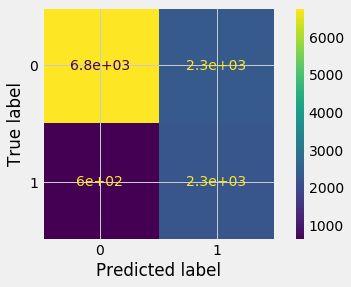

In [89]:
plot_confusion_matrix(clf, X_train_scale, y_train, normalize=None)

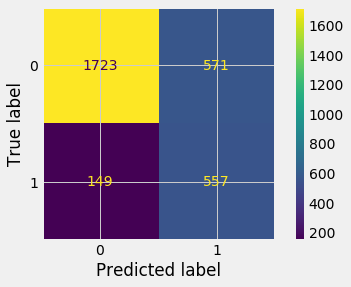

In [112]:
plot_confusion_matrix(clf, X_val_scale, y_val, normalize=None, values_format='.0f')

#557 TP, 571 FP, 1723 TN, 138(4.6%) FN
#The ideal scenario that we all want is that the model should give 0 False Positives and 0 False Negatives
#Model classifying things incorrectly as compared to the actual class
#In this business case we want to minimize FN

In [113]:
#Log loss of X_train
log_loss(y_train,clf.predict_proba(X_train_scale))

0.5457351722118393

In [114]:
#Log loss of X_val
log_loss(y_val,clf.predict_proba(X_val_scale))

0.5554067286929001

In [115]:
print(accuracy_score(y_train,y_train_pred_scale))
print(accuracy_score(y_val,y_val_pred_scale))

#high accuracy score because by default already having a lot of low probabilities because of the inbalance

0.7548129010750896
0.76


In [116]:
print(precision_score(y_train,y_train_pred_scale))
print(precision_score(y_val,y_val_pred_scale))

0.4916431517256349
0.49379432624113473


In [117]:
print(recall_score(y_train,y_train_pred_scale))
print(recall_score(y_val,y_val_pred_scale))

0.7905759162303665
0.7889518413597734


In [118]:
print(f1_score(y_train,y_train_pred_scale))
print(f1_score(y_val,y_val_pred_scale))

0.6062633832976445
0.6074154852780806


In [119]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42)
print(cross_val_score(clf, X, y, cv=cv, scoring='accuracy').mean())
print(cross_val_score(clf, X, y, cv=cv, scoring='recall').mean())
print(cross_val_score(clf, X, y, cv=cv, scoring='precision').mean())
print(cross_val_score(clf, X, y, cv=cv, scoring='f1').mean())
#sorted(sklearn.metrics.SCORERS.keys())
# 0.7736604733057003
# 0.8037204633960786
# 0.61529054598928

0.7523109703234411
0.8107022389375331
0.49530214460334704
0.6118018125163593


In [120]:
#As C goes down the list, the regularization power will increase.
alpha_values = []
log_loss_train = []
log_loss_val = []
acc_train = []
acc_val = []
pre_train = []
pre_val = []
rec_train = []
rec_val = []
f1_train = []
f1_val = []
for C in [1/np.power(10, int(n)) for n in range(0, 7)]:
    clf = LogisticRegression(penalty = 'l1',
                         solver='saga',
                         class_weight='balanced',
                         max_iter=10000, #changed interations from default=100
                         random_state=42,
                         C= C)
    clf.fit(X_train_scale,y_train)
    y_train_pred_scale = clf.predict(X_train_scale) 
    y_val_pred_scale = clf.predict(X_val_scale)
    alpha_values.append(C)
    #Log loss
    log_loss_train.append(log_loss(y_train,clf.predict_proba(X_train_scale)))
    log_loss_val.append(log_loss(y_val,clf.predict_proba(X_val_scale)))
    
    #Accuracy Score
    acc_train.append(accuracy_score(y_train,y_train_pred_scale))
    acc_val.append(accuracy_score(y_val,y_val_pred_scale))
    
    #Precision Score
    pre_train.append(precision_score(y_train,y_train_pred_scale))
    pre_val.append(precision_score(y_val,y_val_pred_scale))
    
    #Recall Score
    rec_train.append(recall_score(y_train,y_train_pred_scale))
    rec_val.append(recall_score(y_val,y_val_pred_scale))
    
    #F1 Score
    f1_train.append(f1_score(y_train,y_train_pred_scale))
    f1_val.append(f1_score(y_val,y_val_pred_scale))
#high accuracy score because by default already having a lot of low probabilities because of the inbalance
    
# higher penalization for values...kind of like MSE - want it to be small - log loss
#high accuracy score because by default already having a lot of low probabilities because of the inbalance
#Can use regularization with logistic regression

In [121]:
scores =  list(zip(alpha_values, log_loss_train, log_loss_val,acc_train,acc_val,pre_train,pre_val,
                   rec_train,rec_val,f1_train,f1_val))
scores_df = pd.DataFrame(scores,columns = ['Alpha' , 'log_loss_train', 'log_loss_val','acc_train','acc_val',
                                           'pre_train','pre_val','rec_train','rec_val','f1_train','f1_val'])
scores_df

,Alpha,log_loss_train,log_loss_val,acc_train,acc_val,pre_train,pre_val,rec_train,rec_val,f1_train,f1_val
0,1.000000,0.545735,0.555407,0.754813,0.760000,0.491643,0.493794,0.790576,0.788952,0.606263,0.607415
1,0.100000,0.545524,0.555079,0.754563,0.759333,0.491297,0.492895,0.788133,0.786119,0.605281,0.605895
2,0.010000,0.545170,0.553630,0.749812,0.754667,0.484895,0.486413,0.767539,0.760623,0.594324,0.593370
3,0.001000,0.606061,0.613365,0.722394,0.717333,0.449480,0.437828,0.723560,0.708215,0.554500,0.541126
4,0.000100,0.743138,0.743745,0.238770,0.235333,0.238770,0.235333,1.000000,1.000000,0.385495,0.381004
5,0.000010,0.743454,0.744064,0.238770,0.235333,0.238770,0.235333,1.000000,1.000000,0.385495,0.381004
6,0.000001,0.743454,0.744064,0.238770,0.235333,0.238770,0.235333,1.000000,1.000000,0.385495,0.381004


In [122]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [123]:
df[df['last_evaluation']>=0.8]['churn'].value_counts(normalize=True)
#people who have high performace from last evaluation churn 10% more 

0    0.696516
1    0.303484
Name: churn, dtype: float64

In [124]:
df[df['last_evaluation']<0.8]['churn'].value_counts(normalize=True)
#people who have high performace from last evaluation 

0    0.802462
1    0.197538
Name: churn, dtype: float64